In [ ]:
from google.colab import files
files = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv("sorted_final.csv", index_col = 0)


pd.pandas.set_option('Display.max_columns', None)


In [ ]:
df.head()


,Station Names,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area,Aus_Production,Amon_Area,Amon_Production,Boro_Area,Boro_Production
0,Barisal,1970,29.849167,21.335000,201.083333,21.335000,1.373333,4.080833,4.080833,NaN,NaN,NaN,NaN,NaN,NaN
1,Bhola,1970,29.835833,21.125000,172.833333,21.125000,2.446667,4.589167,4.589167,NaN,NaN,NaN,NaN,NaN,NaN
2,Bogra,1970,30.431667,20.925833,149.500000,20.925833,1.027500,3.460833,3.460833,286080.0,86400.2994,634460.0,254832.8024,30320.0,20574.9558
3,Chandpur,1970,29.203333,22.090000,131.666667,22.090000,1.090833,2.110833,2.110833,NaN,NaN,NaN,NaN,NaN,NaN
4,Chittagong,1970,29.751667,21.529167,235.666667,21.529167,2.470000,4.370833,4.370833,264775.0,110195.7620,497290.0,289460.0539,143481.0,147662.5025


In [ ]:
df = df.iloc[:,0:11]
df

,Station Names,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area,Aus_Production
0,Barisal,1970,29.849167,21.335000,201.083333,21.335000,1.373333,4.080833,4.080833,NaN,NaN
1,Bhola,1970,29.835833,21.125000,172.833333,21.125000,2.446667,4.589167,4.589167,NaN,NaN
2,Bogra,1970,30.431667,20.925833,149.500000,20.925833,1.027500,3.460833,3.460833,286080.000000,86400.2994
3,Chandpur,1970,29.203333,22.090000,131.666667,22.090000,1.090833,2.110833,2.110833,NaN,NaN
4,Chittagong,1970,29.751667,21.529167,235.666667,21.529167,2.470000,4.370833,4.370833,264775.000000,110195.7620
...,...,...,...,...,...,...,...,...,...,...,...
1521,Srimongal,2018,30.827500,19.622500,182.166667,19.622500,1.327500,3.805833,3.805833,NaN,NaN
1522,Syedpur,2018,30.352500,20.010000,124.416667,20.010000,2.434167,2.901667,2.901667,NaN,NaN
1523,Sylhet,2018,30.565000,20.909167,298.416667,20.909167,1.669167,4.470833,4.470833,286754.109500,157383.0000
1524,Tangail,2018,30.771667,20.838333,136.583333,20.838333,1.020833,3.353333,3.353333,7394.472692,1364.0000


In [ ]:
print(df.shape)

(1561, 11)


In [ ]:
feature_with_nan = [features for features in df.columns if df[features].isnull().sum()>0]

for features in feature_with_nan:
  print(features, np.round(df[features].isnull().mean(),3),'% missing values')

Wind Speed 0.001 % missing values
Cloud Coverage 0.001 % missing values
Bright Sunshine 0.001 % missing values
Aus_Area 0.414 % missing values
Aus_Production 0.414 % missing values


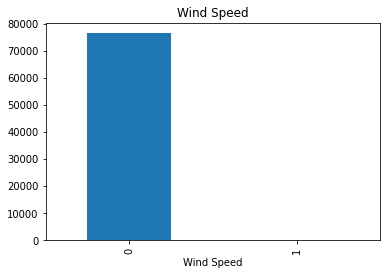

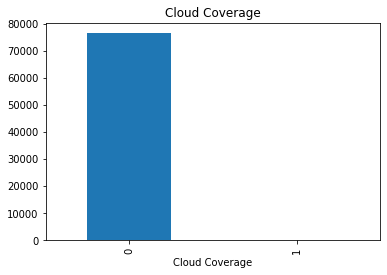

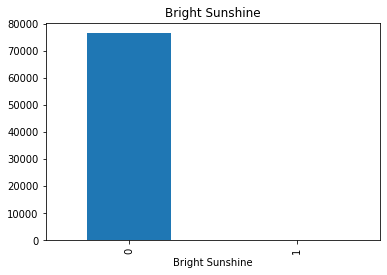

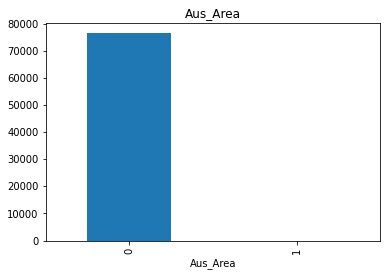

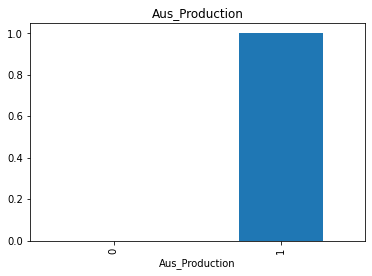

In [ ]:
for features in feature_with_nan:
  data = df.copy() 
  data[features] = np.where(df[features].isnull(),1,0)

  data.groupby(features)['Aus_Production'].median().plot.bar()
  plt.title(features)
  plt.show()

In [ ]:
numerical_features = [features for features in df.columns if df[features].dtypes !='O']

print(len(numerical_features))
df[numerical_features].head()

10


,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area,Aus_Production
0,1970,29.849167,21.335000,201.083333,21.335000,1.373333,4.080833,4.080833,NaN,NaN
1,1970,29.835833,21.125000,172.833333,21.125000,2.446667,4.589167,4.589167,NaN,NaN
2,1970,30.431667,20.925833,149.500000,20.925833,1.027500,3.460833,3.460833,286080.0,86400.2994
3,1970,29.203333,22.090000,131.666667,22.090000,1.090833,2.110833,2.110833,NaN,NaN
4,1970,29.751667,21.529167,235.666667,21.529167,2.470000,4.370833,4.370833,264775.0,110195.7620


In [ ]:
year_features = [features for features in numerical_features if 'YEAR' in features]
print(year_features)

['YEAR']


In [ ]:
for features in year_features :
  print(features,df[features].unique())

YEAR [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018]


<function matplotlib.pyplot.show>

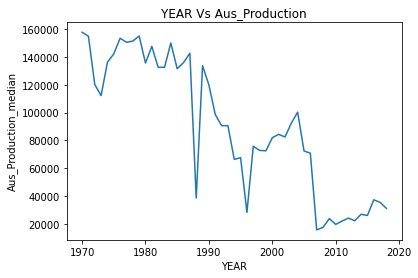

In [ ]:
df.groupby('YEAR')['Aus_Production'].median().plot()
plt.xlabel('YEAR')
plt.ylabel('Aus_Production_median')
plt.title('YEAR Vs Aus_Production')
plt.show

In [ ]:
discreate_features = [features for features in numerical_features if len(df[features].unique())< 25 and features not in year_features]
print("varriable_count {}".format (len(discreate_features)))

varriable_count 0


In [ ]:
continous_features = [features for features in numerical_features if features not in discreate_features+year_features]
print("continous_varriable_count {}".format (len(continous_features)))                

continous_varriable_count 9


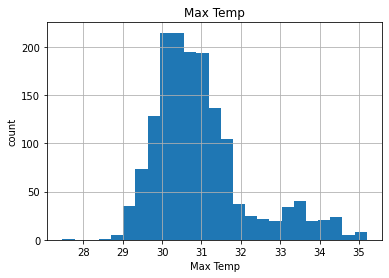

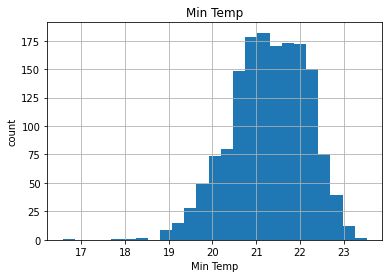

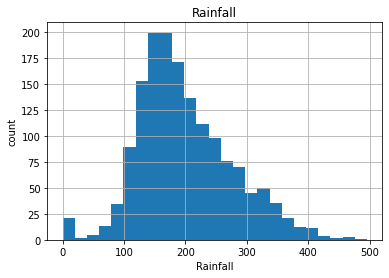

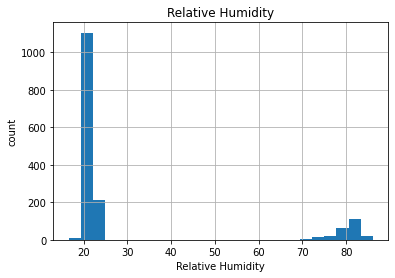

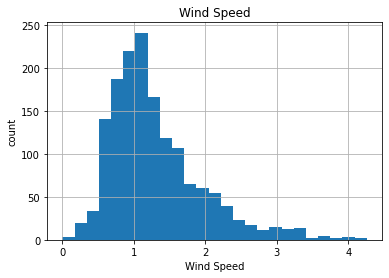

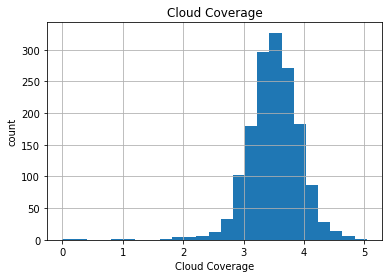

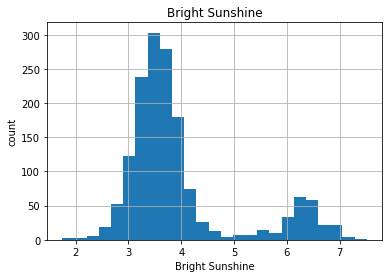

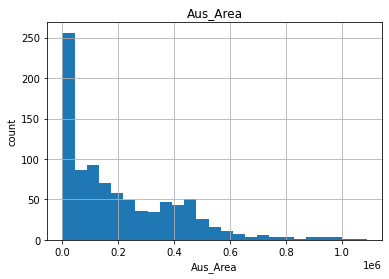

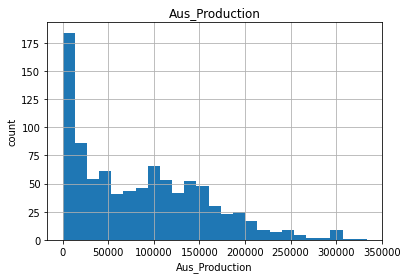

In [ ]:
for features in continous_features:
  data = df.copy()
  #df.groupby(features)['Aus_Production'].median().plot.bar()
  #plt.ylabel("Aus_Production")
  data[features].hist(bins = 25)
  plt.xlabel(features)
  plt.ylabel("count")
  plt.title(features)
  plt.show()
  


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


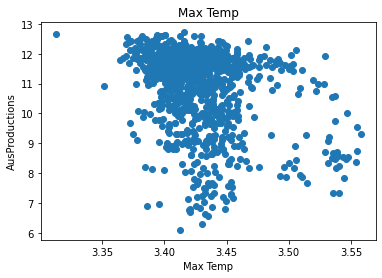

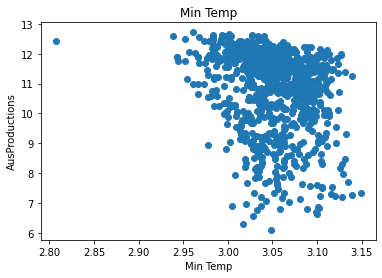

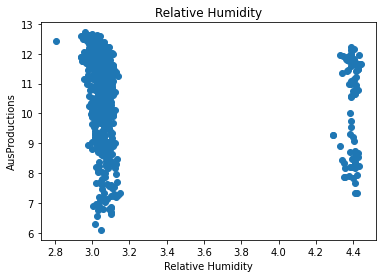

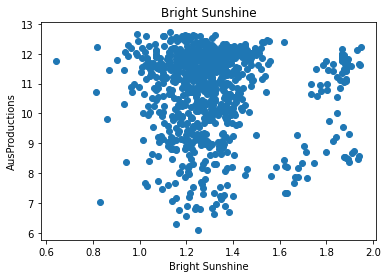

In [ ]:
for features in continous_features:
  data=df.copy()
  if 0 in data[features].unique():
    pass
  else:
    data[features] = np.log(data[features])
    data['Aus_Production'] = np.log(data['Aus_Production'])
    plt.scatter(data[features],data['Aus_Production'])
    plt.xlabel(features)
    plt.ylabel('AusProductions')
    plt.title(features)
    plt.show()  

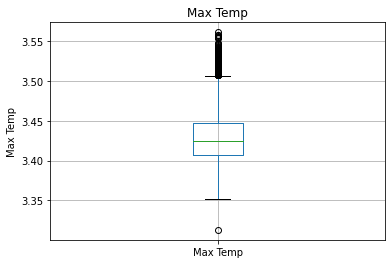

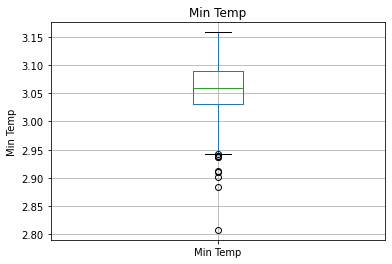

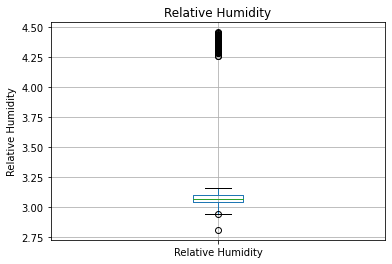

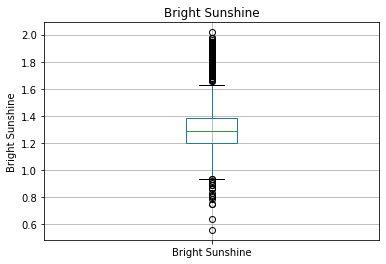

In [ ]:
## Outliers
for features in continous_features:
  data = df.copy()
  if 0 in data[features].unique():
    pass
  else:
    data[features] = np.log(data[features])
    data.boxplot(column = features)
    plt.ylabel(features)
    plt.title(features)
    plt.show()

In [ ]:
df.dtypes

Station Names         object
YEAR                   int64
Max Temp             float64
Min Temp             float64
Rainfall             float64
Relative Humidity    float64
Wind Speed           float64
Cloud Coverage       float64
Bright Sunshine      float64
Aus_Area             float64
Aus_Production       float64
dtype: object

In [ ]:
categorical_features=[features for features in df.columns if df[features].dtypes=='O']
categorical_features

['Station Names']

In [ ]:
df[categorical_features].head(64)

,Station Names
0,Barisal
1,Bhola
2,Bogra
3,Chandpur
4,Chittagong
...,...
700,Maijdee Court
707,Maulavibazar
701,Mymensingh
696,Noakhali


In [ ]:
for features in categorical_features:
    print('The feature is {} and number of categories are {}'.format(features,len(df[features].unique())))

The feature is Station Names and number of categories are 42


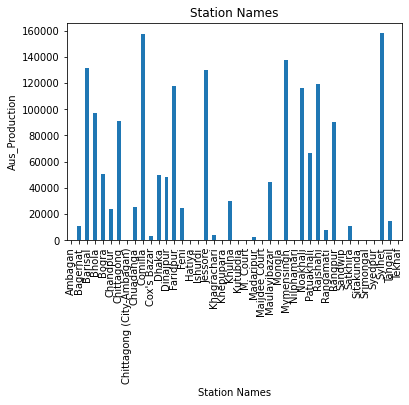

In [ ]:
for features in categorical_features:
    data=df.copy()
    data.groupby(features)['Aus_Production'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('Aus_Production')
    plt.title(features)
    plt.show()

In [ ]:
#start here..

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['Aus_Production'],test_size=0.1,random_state=0)

In [ ]:
X_train.head()

,Station Names,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area,Aus_Production
1494,Bogra,2018,30.634167,21.263333,137.500000,21.263333,1.147500,3.360000,3.360000,131525.1377,53795.00000
759,Khulna,2000,31.565833,21.292500,144.000000,21.292500,0.802500,3.441667,3.441667,52020.0000,29664.94950
197,Sandwip,1984,28.822500,21.880833,219.833333,21.880833,1.794167,3.514167,3.514167,NaN,NaN
59,Cox's Bazar,1980,30.093333,21.721667,121.083333,21.721667,1.731667,3.430000,3.430000,NaN,NaN
43,Patuakhali,1979,30.792500,22.050000,203.583333,22.050000,1.273333,3.403333,3.403333,140565.0000,45059.87895


In [ ]:
X_train = X_train.dropna(axis=0)


In [ ]:
X_train

,Station Names,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area,Aus_Production
1494,Bogra,2018,30.634167,21.263333,137.500000,21.263333,1.147500,3.360000,3.360000,131525.1377,53795.00000
759,Khulna,2000,31.565833,21.292500,144.000000,21.292500,0.802500,3.441667,3.441667,52020.0000,29664.94950
43,Patuakhali,1979,30.792500,22.050000,203.583333,22.050000,1.273333,3.403333,3.403333,140565.0000,45059.87895
1012,Sylhet,2007,30.107500,20.798333,361.500000,20.798333,1.472500,4.208333,4.208333,107250.0000,81782.00000
600,Khulna,1996,31.676667,21.325833,122.583333,21.325833,1.296667,3.245833,3.245833,27580.0000,20139.50700
...,...,...,...,...,...,...,...,...,...,...,...
1141,Sylhet,2013,31.244167,20.774167,318.750000,20.774167,1.560000,4.377500,4.377500,86351.0000,77673.00000
574,Rangamati,1995,31.130833,21.129167,200.250000,21.129167,0.810833,3.845000,3.845000,14000.0000,5651.76255
649,Sylhet,1997,30.172500,20.166667,303.083333,20.166667,1.198333,5.039167,5.039167,445670.0000,237900.19440
1077,Chandpur,2009,31.537500,22.171667,128.833333,22.171667,1.036667,3.866667,3.866667,31390.0000,23942.00000


In [ ]:
X_train.isnull().sum()

Station Names        0
YEAR                 0
Max Temp             0
Min Temp             0
Rainfall             0
Relative Humidity    0
Wind Speed           0
Cloud Coverage       0
Bright Sunshine      0
Aus_Area             0
Aus_Production       0
dtype: int64

In [ ]:
 X_train[numerical_features]

,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area,Aus_Production
1494,2018,30.634167,21.263333,137.500000,21.263333,1.147500,3.360000,3.360000,131525.1377,53795.00000
759,2000,31.565833,21.292500,144.000000,21.292500,0.802500,3.441667,3.441667,52020.0000,29664.94950
43,1979,30.792500,22.050000,203.583333,22.050000,1.273333,3.403333,3.403333,140565.0000,45059.87895
1012,2007,30.107500,20.798333,361.500000,20.798333,1.472500,4.208333,4.208333,107250.0000,81782.00000
600,1996,31.676667,21.325833,122.583333,21.325833,1.296667,3.245833,3.245833,27580.0000,20139.50700
...,...,...,...,...,...,...,...,...,...,...
1141,2013,31.244167,20.774167,318.750000,20.774167,1.560000,4.377500,4.377500,86351.0000,77673.00000
574,1995,31.130833,21.129167,200.250000,21.129167,0.810833,3.845000,3.845000,14000.0000,5651.76255
649,1997,30.172500,20.166667,303.083333,20.166667,1.198333,5.039167,5.039167,445670.0000,237900.19440
1077,2009,31.537500,22.171667,128.833333,22.171667,1.036667,3.866667,3.866667,31390.0000,23942.00000


In [ ]:
import numpy as np
num_features=['YEAR','Max Temp','Min Temp','Relative Humidity','Bright Sunshine']

for features in num_features:
    X_train[features]=np.log(X_train[features])

In [ ]:
X_train

,Station Names,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area,Aus_Production
1494,Bogra,7.609862,3.422116,3.056984,137.500000,3.056984,1.147500,3.360000,1.211941,131525.1377,53795.00000
759,Khulna,7.600902,3.452075,3.058355,144.000000,3.058355,0.802500,3.441667,1.235956,52020.0000,29664.94950
43,Patuakhali,7.590347,3.427271,3.093313,203.583333,3.093313,1.273333,3.403333,1.224755,140565.0000,45059.87895
1012,Sylhet,7.604396,3.404774,3.034873,361.500000,3.034873,1.472500,4.208333,1.437067,107250.0000,81782.00000
600,Khulna,7.598900,3.455580,3.059919,122.583333,3.059919,1.296667,3.245833,1.177372,27580.0000,20139.50700
...,...,...,...,...,...,...,...,...,...,...,...
1141,Sylhet,7.607381,3.441833,3.033710,318.750000,3.033710,1.560000,4.377500,1.476478,86351.0000,77673.00000
574,Rangamati,7.598399,3.438199,3.050654,200.250000,3.050654,0.810833,3.845000,1.346774,14000.0000,5651.76255
649,Sylhet,7.599401,3.406931,3.004031,303.083333,3.004031,1.198333,5.039167,1.617241,445670.0000,237900.19440
1077,Chandpur,7.605392,3.451177,3.098815,128.833333,3.098815,1.036667,3.866667,1.352393,31390.0000,23942.00000


In [ ]:
for features in categorical_features:
    labels_ordered=X_train.groupby([features])['Aus_Production'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    X_train[features]=X_train[features].map(labels_ordered)

In [ ]:
X_train.head()

,Station Names,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area,Aus_Production
1494,13,7.609862,3.422116,3.056984,137.500000,3.056984,1.147500,3.360000,1.211941,131525.1377,53795.00000
759,10,7.600902,3.452075,3.058355,144.000000,3.058355,0.802500,3.441667,1.235956,52020.0000,29664.94950
43,15,7.590347,3.427271,3.093313,203.583333,3.093313,1.273333,3.403333,1.224755,140565.0000,45059.87895
1012,25,7.604396,3.404774,3.034873,361.500000,3.034873,1.472500,4.208333,1.437067,107250.0000,81782.00000
600,10,7.598900,3.455580,3.059919,122.583333,3.059919,1.296667,3.245833,1.177372,27580.0000,20139.50700


In [ ]:
scaling_features=[features for features in X_train.columns if features not in ['Aus_Production'] ]
len(scaling_features)

10

In [ ]:
feature_scale=[features for features in X_train.columns if features not in ['Aus_Production']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train[feature_scale])

MinMaxScaler()

In [ ]:
scaler.transform(X_train[feature_scale])

array([[0.48148148, 1.        , 0.44579291, ..., 0.46494955, 0.43697517,
        0.12066859],
       [0.37037037, 0.62781538, 0.56822979, ..., 0.49097185, 0.45539688,
        0.04772608],
       [0.55555556, 0.18934292, 0.46686104, ..., 0.4787573 , 0.44680502,
        0.12896227],
       ...,
       [0.92592593, 0.56545911, 0.38373527, ..., 1.        , 0.74787899,
        0.40888281],
       [0.2962963 , 0.81432453, 0.56455988, ..., 0.62639405, 0.54471521,
        0.02879896],
       [0.85185185, 0.39871665, 0.55482948, ..., 0.37387148, 0.36877487,
        0.35464279]])

In [ ]:
X_trains = pd.concat([X_train['Aus_Production'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[feature_scale]), columns=feature_scale)],
                    axis=1)
X_trains

,Aus_Production,Station Names,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area
0,53795.00000,0.481481,1.000000,0.445793,0.731191,0.277591,0.152802,0.264562,0.464950,0.436975,0.120669
1,29664.94950,0.370370,0.627815,0.568230,0.735210,0.290713,0.153642,0.176232,0.490972,0.455397,0.047726
2,45059.87895,0.555556,0.189343,0.466861,0.837703,0.411003,0.175061,0.296778,0.478757,0.446805,0.128962
3,81782.00000,0.925926,0.772950,0.374922,0.666363,0.729812,0.139255,0.347770,0.735263,0.609668,0.098397
4,20139.50700,0.370370,0.544653,0.582554,0.739796,0.247476,0.154601,0.302752,0.428571,0.410458,0.025303
...,...,...,...,...,...,...,...,...,...,...,...
824,77673.00000,0.925926,0.896949,0.526371,0.662954,0.643506,0.138542,0.370173,0.789166,0.639900,0.079223
825,5651.76255,0.148148,0.523836,0.511520,0.712633,0.404273,0.148924,0.178366,0.619490,0.540405,0.012844
826,237900.19440,0.925926,0.565459,0.383735,0.575937,0.611878,0.120358,0.277576,1.000000,0.747879,0.408883
827,23942.00000,0.296296,0.814325,0.564560,0.853836,0.260094,0.178432,0.236185,0.626394,0.544715,0.028799


In [ ]:
X_trains.to_csv('X_train.csv',index=False)

In [ ]:
X_trains = X_trains.drop(columns = ['Aus_Production'])

X_trains

,Station Names,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area
0,0.481481,1.000000,0.445793,0.731191,0.277591,0.152802,0.264562,0.464950,0.436975,0.120669
1,0.370370,0.627815,0.568230,0.735210,0.290713,0.153642,0.176232,0.490972,0.455397,0.047726
2,0.555556,0.189343,0.466861,0.837703,0.411003,0.175061,0.296778,0.478757,0.446805,0.128962
3,0.925926,0.772950,0.374922,0.666363,0.729812,0.139255,0.347770,0.735263,0.609668,0.098397
4,0.370370,0.544653,0.582554,0.739796,0.247476,0.154601,0.302752,0.428571,0.410458,0.025303
...,...,...,...,...,...,...,...,...,...,...
824,0.925926,0.896949,0.526371,0.662954,0.643506,0.138542,0.370173,0.789166,0.639900,0.079223
825,0.148148,0.523836,0.511520,0.712633,0.404273,0.148924,0.178366,0.619490,0.540405,0.012844
826,0.925926,0.565459,0.383735,0.575937,0.611878,0.120358,0.277576,1.000000,0.747879,0.408883
827,0.296296,0.814325,0.564560,0.853836,0.260094,0.178432,0.236185,0.626394,0.544715,0.028799


In [ ]:
Y_trains = X_train['Aus_Production']
Y_trains

1494     53795.00000
759      29664.94950
43       45059.87895
1012     81782.00000
600      20139.50700
            ...     
1141     77673.00000
574       5651.76255
649     237900.19440
1077     23942.00000
371     146660.06300
Name: Aus_Production, Length: 829, dtype: float64

In [ ]:
X_test = X_test.dropna(axis=0)

In [ ]:
X_test.isnull().sum()

Station Names        0
YEAR                 0
Max Temp             0
Min Temp             0
Rainfall             0
Relative Humidity    0
Wind Speed           0
Cloud Coverage       0
Bright Sunshine      0
Aus_Area             0
Aus_Production       0
dtype: int64

In [ ]:
num_features=['YEAR','Max Temp','Min Temp','Relative Humidity','Bright Sunshine']

for features in num_features:
    X_test[features]=np.log(X_test[features])

In [ ]:
for features in categorical_features:
    labels_ordered=X_test.groupby([features])['Aus_Production'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    X_test[features]=X_test[features].map(labels_ordered)

In [ ]:
scaling_features=[features for features in X_test.columns if features not in ['Aus_Production'] ]
len(scaling_features)

10

In [ ]:
feature_scale=[features for features in X_test.columns if features not in ['Aus_Production']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_test[feature_scale])

MinMaxScaler()

In [ ]:
scaler.transform(X_test[feature_scale])

array([[3.00000000e-01, 4.71021718e-01, 1.77853057e-01, 8.48455035e-02,
        3.65388877e-01, 1.07567299e-02, 1.60424188e-01, 1.78844815e-01,
        1.62792021e-01, 1.85112705e-01],
       [4.50000000e-01, 3.21717817e-01, 2.95900350e-01, 5.14672527e-01,
        3.75138489e-01, 6.52502859e-02, 1.84792419e-01, 2.66875435e-01,
        2.33951628e-01, 2.22704918e-01],
       [3.50000000e-01, 3.64429733e-01, 3.12894604e-01, 8.96059745e-01,
        1.25193884e-01, 1.13602634e-01, 3.29196751e-01, 4.59986082e-01,
        3.73982389e-01, 2.64349385e-01],
       [3.00000000e-01, 7.89199721e-01, 1.32524596e-01, 4.02813676e-01,
        3.49878130e-01, 5.10687985e-02, 5.86642598e-02, 4.40153096e-01,
        3.60490660e-01, 1.97336066e-02],
       [8.00000000e-01, 8.52549888e-01, 6.71816713e-01, 6.76712003e-01,
        3.05783293e-01, 8.57936831e-02, 6.99458484e-01, 2.63743911e-01,
        2.31507133e-01, 8.29334016e-02],
       [6.00000000e-01, 3.21717817e-01, 3.16926013e-01, 6.11324172e-01,
   

In [ ]:
X_tests = pd.concat([X_test['Aus_Production'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[feature_scale]), columns=feature_scale)],
                    axis=1)
X_tests

,Aus_Production,Station Names,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area
0,70533.63375,0.30,0.471022,0.177853,0.084846,0.365389,0.010757,0.160424,0.178845,0.162792,0.185113
1,85925.84165,0.45,0.321718,0.295900,0.514673,0.375138,0.065250,0.184792,0.266875,0.233952,0.222705
2,80031.86070,0.35,0.364430,0.312895,0.896060,0.125194,0.113603,0.329197,0.459986,0.373982,0.264349
3,14343.00000,0.30,0.789200,0.132525,0.402814,0.349878,0.051069,0.058664,0.440153,0.360491,0.019734
4,71742.00000,0.80,0.852550,0.671817,0.676712,0.305783,0.085794,0.699458,0.263744,0.231507,0.082933
...,...,...,...,...,...,...,...,...,...,...,...
81,5512.00000,0.75,0.810327,0.274127,0.699695,0.319743,0.088707,0.024143,0.414057,0.342450,0.020225
82,0.00000,0.00,0.894731,0.907554,0.306435,0.396632,0.950094,1.000000,0.321155,0.835776,0.000000
83,118995.45650,0.95,0.577346,0.019584,0.371536,0.489253,0.047103,0.257897,0.572373,0.447106,0.268791
84,125637.00000,0.90,0.978967,0.365933,0.715030,0.951917,0.090652,0.349729,1.000000,0.684018,0.118899


In [ ]:
X_tests = X_tests.drop(columns = ['Aus_Production'])

X_tests

,Station Names,YEAR,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Aus_Area
0,0.30,0.471022,0.177853,0.084846,0.365389,0.010757,0.160424,0.178845,0.162792,0.185113
1,0.45,0.321718,0.295900,0.514673,0.375138,0.065250,0.184792,0.266875,0.233952,0.222705
2,0.35,0.364430,0.312895,0.896060,0.125194,0.113603,0.329197,0.459986,0.373982,0.264349
3,0.30,0.789200,0.132525,0.402814,0.349878,0.051069,0.058664,0.440153,0.360491,0.019734
4,0.80,0.852550,0.671817,0.676712,0.305783,0.085794,0.699458,0.263744,0.231507,0.082933
...,...,...,...,...,...,...,...,...,...,...
81,0.75,0.810327,0.274127,0.699695,0.319743,0.088707,0.024143,0.414057,0.342450,0.020225
82,0.00,0.894731,0.907554,0.306435,0.396632,0.950094,1.000000,0.321155,0.835776,0.000000
83,0.95,0.577346,0.019584,0.371536,0.489253,0.047103,0.257897,0.572373,0.447106,0.268791
84,0.90,0.978967,0.365933,0.715030,0.951917,0.090652,0.349729,1.000000,0.684018,0.118899


In [ ]:
Y_tests = X_test['Aus_Production']
Y_tests

457      70533.63375
205      85925.84165
283      80031.86070
990      14343.00000
1296     71742.00000
            ...     
1025      5512.00000
1382         0.00000
639     118995.45650
1558    125637.00000
1065    180280.33910
Name: Aus_Production, Length: 86, dtype: float64

In [ ]:
#model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_trains,Y_trains)


LinearRegression()

In [ ]:
y_predict = regressor.predict(X_tests)


In [ ]:
r2_score(Y_tests,y_predict)

0.7601518345442679